In [1]:
import numpy as np
import pandas as pd
import os

# Visulaisation Tools
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
# os.getcwd()

'C:\\Users\\mfaiz\\01 Jupyter Notes\\01. IMARTICUS\\Kaggle Projects'

In [3]:
# os.chdir('C:\\Users\\mfaiz\\Downloads\\BlackFriday')

In [2]:
df = pd.read_csv('Black_Friday_train.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
df.nunique()

User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

In [8]:
# count data types

df.dtypes.value_counts()

int64      5
object     5
float64    2
dtype: int64

In [9]:
df.shape

(550068, 12)

# Checking the null values

In [10]:
# check if the data has any null values

df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

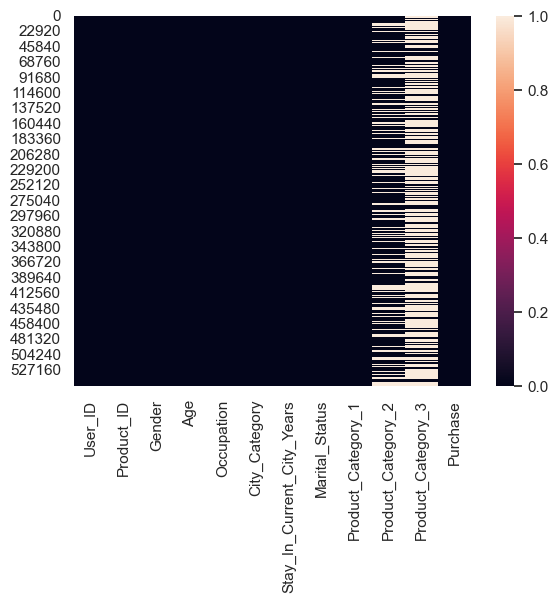

In [11]:
sns.heatmap(df.isnull())
plt.show()

In [12]:
# Total of all the Null values in the dataset

df.isnull().sum().sum()

556885

# Checking for duplicate

In [13]:
df.duplicated().sum()

0

In [14]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

## Change the column names

In [15]:
df.rename(columns = {'Product_Category_1':'Product1','Product_Category_2':'Product2',
                     'Product_Category_3':'Product3', 'Stay_In_Current_City_Years':'City_Stay'}, inplace = True)

In [16]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'City_Stay', 'Marital_Status', 'Product1', 'Product2', 'Product3',
       'Purchase'],
      dtype='object')

## Droping out unnecessary data
    'ProductID' column in the 'df' dataset seems unnecessary. And removing it from the dataset won't cause us any harm.

In [17]:
df.drop(['Product_ID'], inplace = True, axis = 'columns')
df.head()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


# DATA CLEANING PROCESS

## 1. Column : User_id

In [18]:
df['User_ID'].unique()

array([1000001, 1000002, 1000003, ..., 1004113, 1005391, 1001529],
      dtype=int64)

In [19]:
df['User_ID'].dtype  # there is no need to change in ['User_ID'] this column

dtype('int64')

## 2. Column : Gender

In [20]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [21]:
df['Gender'].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

In [22]:
df['Gender'].value_counts()['F']

135809

In [23]:
df['Gender'].value_counts()['M']

414259

In [24]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,55+,16,C,4+,0,8,NaN,NaN,7969


## 3. Column AGE

In [25]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [26]:
df['Age'].dtype

dtype('O')

In [27]:
def Ages(value):
    if '0-17' in value:
        value = value.replace('0-17', 'Child')
        return str(value)
    elif '18-25' in value:
        value = value.replace('18-25', 'Teenage')
        return str(value)
    elif '26-35' in value:
        value = value.replace('26-35', 'Adult')
        return str(value)
    elif '36-45' in value:
        value = value.replace('36-45', 'Adult')
        return str(value)
    elif '46-50' in value:
        value = value.replace('46-50', 'Adult')
        return str(value)
    elif '51-55' in value:
        value = value.replace('51-55', 'Old')
        return str(value)
    else:
        value = value.replace('55+', 'Old')
        return str(value)
        
df['Age'] = df['Age'].apply(Ages)
    

In [28]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,Child,10,A,2,0,3,NaN,NaN,8370
1,1000001,F,Child,10,A,2,0,1,6.0,14.0,15200
2,1000001,F,Child,10,A,2,0,12,NaN,NaN,1422
3,1000001,F,Child,10,A,2,0,12,14.0,NaN,1057
4,1000002,M,Old,16,C,4+,0,8,NaN,NaN,7969


* Over here we have replaced the age groups according to the categories.
* We have replaced numerical data into categorical data.
* The types of categories are: Child, Adult, Teenage and Old.
1. 0-17 -> Child
2. 18-25 -> Teenage
3. 26-35 -> Adult
4. 36-45 -> Adult
5. 46-50 -> Adult
6. 51-55 -> Old
7. 55+ -> Old

## 4. Column : Occupation

In [29]:
df['Occupation'].unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

## 5. column : City_category

In [30]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

## 6. Column : City_Stay 

In [31]:
# Column- city-stay

print('Unique_values :',df['City_Stay'].unique())
print('Data_type :',df['City_Stay'].dtype)

Unique_values : ['2' '4+' '3' '1' '0']
Data_type : object


In [32]:
# remove '+' sign from the number in City_Stay

def Cities(value):
    if '+' in value:
        value = value.replace('+','')
        return int(value)
    else:
        return int(value)
    
df['City_Stay'] = df['City_Stay'].apply(Cities)
        

In [33]:
df['City_Stay'].unique()

array([2, 4, 3, 1, 0], dtype=int64)

## 7. Column : Marital_Status

In [34]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Occupation', 'City_Category', 'City_Stay',
       'Marital_Status', 'Product1', 'Product2', 'Product3', 'Purchase'],
      dtype='object')

In [35]:
df['Marital_Status'].unique()

array([0, 1], dtype=int64)

* There's nothing to change in this column.
    1. Here married status -> 1
    2. Whereas single status -> 0

## 8. column : Product1

In [36]:
df['Product1'].unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

## 9. Product2

In [37]:
df['Product2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

* Now, we have to dean with these NULL values

In [38]:
df['Product2'].value_counts()

8.0     64088
14.0    55108
2.0     49217
16.0    43255
15.0    37855
5.0     26235
4.0     25677
6.0     16466
11.0    14134
17.0    13320
13.0    10531
9.0      5693
12.0     5528
10.0     3043
3.0      2884
18.0     2770
7.0       626
Name: Product2, dtype: int64

In [39]:
df['Product2'].isnull().sum()

173638

In [40]:
s1 = round(df['Product2'].mean())
s1

10

In [41]:
df['Product2'].fillna(s1, inplace = True)

In [42]:
df['Product1'].isnull().sum()

0

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City_Stay       550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        550068 non-null  float64
 9   Product3        166821 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 46.2+ MB


In [44]:
df.tail()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
550063,1006033,M,Old,13,B,1,1,20,10.0,NaN,368
550064,1006035,F,Adult,1,C,3,0,20,10.0,NaN,371
550065,1006036,F,Adult,15,B,4,1,20,10.0,NaN,137
550066,1006038,F,Old,1,C,2,0,20,10.0,NaN,365
550067,1006039,F,Adult,0,B,4,1,20,10.0,NaN,490


In [45]:
df['Product2'] = df['Product2'].astype(int)
df.dtypes

User_ID             int64
Gender             object
Age                object
Occupation          int64
City_Category      object
City_Stay           int64
Marital_Status      int64
Product1            int64
Product2            int32
Product3          float64
Purchase            int64
dtype: object

## 10. Column : Product3

In [46]:
df['Product3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [47]:
df['Product3'].isnull().sum()

383247

* Product3 has null value

In [48]:
s2 = round(df['Product3'].mean())
s2

13

In [49]:
df['Product3'].fillna(s2, inplace = True)

In [50]:
df['Product3'].isnull().sum()

0

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   User_ID         550068 non-null  int64  
 1   Gender          550068 non-null  object 
 2   Age             550068 non-null  object 
 3   Occupation      550068 non-null  int64  
 4   City_Category   550068 non-null  object 
 5   City_Stay       550068 non-null  int64  
 6   Marital_Status  550068 non-null  int64  
 7   Product1        550068 non-null  int64  
 8   Product2        550068 non-null  int32  
 9   Product3        550068 non-null  float64
 10  Purchase        550068 non-null  int64  
dtypes: float64(1), int32(1), int64(6), object(3)
memory usage: 44.1+ MB


In [52]:
#  Change the data type of Product3

df['Product3'] = df['Product3'].astype(int)
df.dtypes

User_ID            int64
Gender            object
Age               object
Occupation         int64
City_Category     object
City_Stay          int64
Marital_Status     int64
Product1           int64
Product2           int32
Product3           int32
Purchase           int64
dtype: object

In [53]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,Child,10,A,2,0,3,10,13,8370
1,1000001,F,Child,10,A,2,0,1,6,14,15200
2,1000001,F,Child,10,A,2,0,12,10,13,1422
3,1000001,F,Child,10,A,2,0,12,14,13,1057
4,1000002,M,Old,16,C,4,0,8,10,13,7969


***We have cleaned the data. Now, we will again check it***

In [54]:
df.isnull().sum()

User_ID           0
Gender            0
Age               0
Occupation        0
City_Category     0
City_Stay         0
Marital_Status    0
Product1          0
Product2          0
Product3          0
Purchase          0
dtype: int64

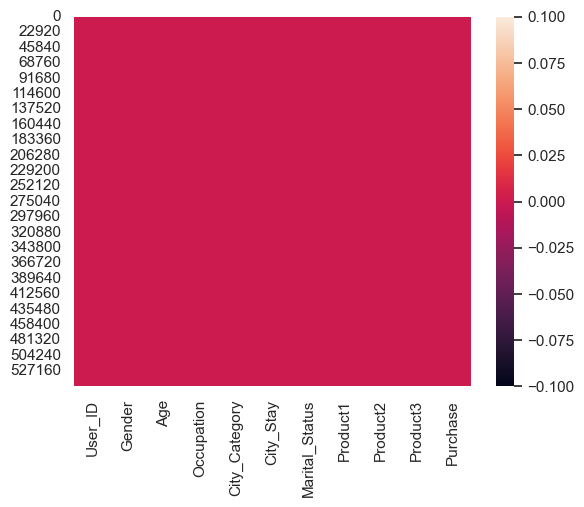

In [55]:
sns.heatmap(df.isnull(), color = 'red')
plt.show()

***The heat map shows that there is no null value present in data set.***

* Our data now seems to be clean. So, we'll start will Data Visualization.

=> Checking the feature of Purchase feature -

* We can use the code written below. But in this code we will not be able to adjust the size of the entire subplot. Hence, we'll prefer the other code.

-> ***plt.subplot(2,2,1)*** -> sns.distplot(bfs['Purchase'], rug = True) -> plt.title('Distribution')

-> ***plt.subplot(2,2,2***, figsize=(12,8)) -> sns.boxenplot(x=bfs['Purchase'], data=bfs, palette="rocket_r") -> plt.title('Outliers')

-> ***plt.subplot(2,2,3, figsize=(12,8))*** -> sns.violinplot(x=bfs['Purchase'], alpha=.7, palette="rocket_r", data=bfs)

-> ***plt.subplot(2,2,4, figsize=(12,8))*** -> sns.boxplot(x=bfs['Purchase'], y=bfs['Gender'], data=bfs, palette="rocket_r")

-> ***plt.tight_layout()*** -> plt.show()

###### Let's check for the outliers in the data. We will examine the purchase column for this.
**`Detecting Outlier using Z-score`**
> ***Formula for z-score = (Observation - Mean) / Standard Deviation***

In [56]:
# Find the limits

Upper_limit = df['Purchase'].mean() + 3*df['Purchase'].std()
lower_limit = df['Purchase'].mean() - 3*df['Purchase'].std()

print('Upper_limit :',Upper_limit)
print('lower_limit :', lower_limit)

Upper_limit : 24333.164894421006
lower_limit : -5805.227468502755


## Find the Outliers

In [57]:
df.loc[(df['Purchase'] > Upper_limit) | (df['Purchase'] < lower_limit)]

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase


***Z-Score method shows no outliers. therefore, we'll confirm it using the inter_quartile Range Method***

In [58]:
#  Detecting Outliers using Inter_Quartile_Range

In [59]:
Q1 = df['Purchase'].quantile(q=0.25)
Q3 = df['Purchase'].quantile(q=0.75)

IQR = Q3 - Q1

print('Q1 :', Q1)
print('Q3 :', Q3)
print('IQR :', IQR)

Q1 : 5823.0
Q3 : 12054.0
IQR : 6231.0


In [60]:
upper_limit = Q3 + (1.5*IQR)
lower_limit = Q1 - (1.5*IQR)

print('upper_limit :', upper_limit)
print('lower_limit :', lower_limit)

upper_limit : 21400.5
lower_limit : -3523.5


<AxesSubplot:xlabel='Purchase'>

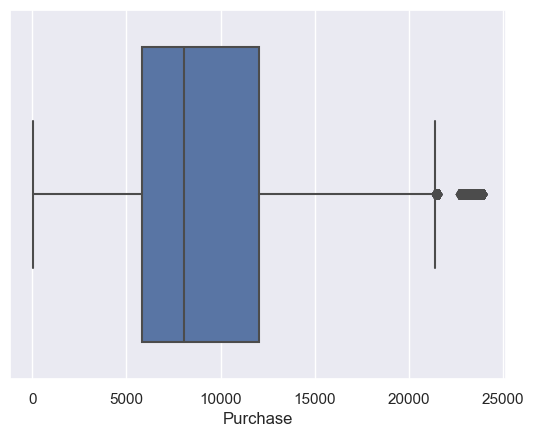

In [61]:
sns.boxplot(df['Purchase'])

### Find the Outliers


In [62]:
df.loc[(df['Purchase'] > upper_limit) | (df['Purchase'] < lower_limit)] # here | is used for 'or'

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
343,1000058,M,Adult,2,B,3,0,10,16,13,23603
375,1000062,F,Adult,3,A,1,0,10,13,13,23792
652,1000126,M,Teenage,9,B,1,0,10,14,16,23233
736,1000139,F,Adult,20,C,2,0,10,15,16,23595
1041,1000175,F,Adult,2,B,1,0,10,15,13,23341
...,...,...,...,...,...,...,...,...,...,...,...
544488,1005815,M,Adult,20,B,1,0,10,13,16,23753
544704,1005847,F,Teenage,4,B,2,0,10,13,13,23724
544743,1005852,F,Adult,1,A,0,1,10,16,13,23529
545663,1006002,M,Old,0,C,1,1,10,13,16,23663


***This clearly shows that our data has some outliers present in it. Now we have two options in front of us:***
* **Trimming** - delete the outlier data
* **Capping** - change the outlier values to upper or lower limit values

**Our dataset is not a gigantic data set. Therefroe, we will not trim our data instead we'll go with capping**

In [63]:
# Capping - change the outlier values to upper or lower limit values

df = df.copy()

df.loc[(df['Purchase'] > upper_limit), 'Purchase'] = upper_limit
df.loc[(df['Purchase'] < lower_limit), 'Purchase'] = lower_limit

In this code we're changing the values that are greater than the Upper_limit to Upper_limit and similarly values which are less than the Lower_limit are replaced by the Lower_limit value

<AxesSubplot:xlabel='Purchase'>

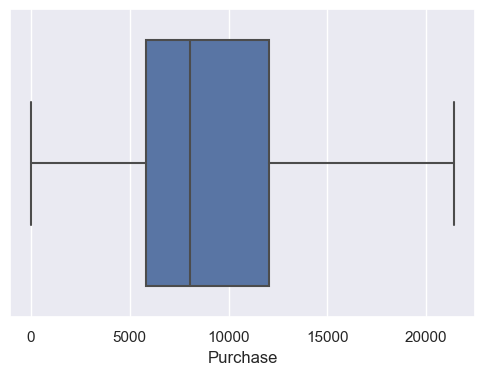

In [64]:
plt.figure(figsize = (6,4))
sns.boxplot(df['Purchase'])

In [65]:
df.describe()

,User_ID,Occupation,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,1.858418,0.409653,5.404270,9.892101,12.899387,9255.024296
std,1.727592e+03,6.522660,1.289443,0.491770,3.936211,4.208490,2.276942,4999.516285
min,1.000001e+06,0.000000,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,1.000000,0.000000,1.000000,8.000000,13.000000,5823.000000
50%,1.003077e+06,7.000000,2.000000,0.000000,5.000000,10.000000,13.000000,8047.000000
75%,1.004478e+06,14.000000,3.000000,1.000000,8.000000,14.000000,13.000000,12054.000000
max,1.006040e+06,20.000000,4.000000,1.000000,20.000000,18.000000,18.000000,21400.500000


## Mean of Purchase for each Gender according to Age

In [66]:
pd.pivot_table(data = df, index = 'Age', values = 'Purchase', columns = ['Gender'], aggfunc = 'mean')

Gender,F,M
Age,,
Adult,8805.594226,9407.757830
Child,8331.026461,9227.157551
Old,9013.334212,9592.524574
Teenage,8339.706026,9434.812493


## Mean of Purchase for each Gender according to Marital Status

In [67]:
pd.pivot_table(data = df, index = 'Gender', values = 'Purchase', columns = 'Marital_Status', aggfunc = 'mean')

Marital_Status,0,1
Gender,,
F,8672.561272,8800.522803
M,9445.012860,9404.068016


## Mean of Purchase for each Gender according to City

In [68]:
pd.pivot_table(data = df, index = 'City_Category', values = 'Purchase', columns = 'Gender', aggfunc = 'mean')

Gender,F,M
City_Category,,
A,8571.748684,9009.245706
B,8533.189581,9346.166957
C,9120.381136,9903.298803


## Sum of Purchase for each Age according to Marital_Status

In [69]:
pd.pivot_table(data = df, index = 'Age',values='Purchase', columns = 'Marital_Status', aggfunc = 'mean')

Marital_Status,0,1
Age,,
Adult,9272.994095,9246.647967
Child,8925.539597,NaN
Old,9543.838532,9404.480246
Teenage,9211.257072,8989.115150


## Mean of Purchase for each Gender according to city

In [70]:
pd.pivot_table(data = df, index = 'Gender',values = 'Purchase', columns = 'City_Category', aggfunc = 'mean')

City_Category,A,B,C
Gender,,,
F,8571.748684,8533.189581,9120.381136
M,9009.245706,9346.166957,9903.298803


In [71]:
pd.pivot_table(data = df, index = 'Age',values = 'Purchase', columns = 'City_Category', aggfunc = 'mean')

City_Category,A,B,C
Age,,,
Adult,8910.513133,9141.429202,9791.260539
Child,8601.165291,8907.227047,9055.363681
Old,9117.297198,9429.827555,9579.696099
Teenage,8828.847885,9026.061704,9690.792783


## Mean of Purchase on the bases of Gender, Age, City and Stay in City

In [72]:
pd.pivot_table(data = df, index = ('Age', 'Gender'), values = 'Purchase', columns = ['City_Category', 'City_Stay'], aggfunc = 'mean')

City_Category             A                                           \
City_Stay                 0            1             2             3   
Age     Gender                                                         
Adult   F       8928.956562  8669.450531   8480.478859   8729.622760   
        M       9167.410452  8833.293138   9047.609402   9099.840581   
Child   F       5631.365714  7984.401198   7951.549724   8214.097754   
        M       9702.305732  8753.769634  10518.326291  10041.094203   
Old     F       9147.204420  8407.219494   9122.068122   8791.981527   
        M       8831.406907  9698.179165   8856.176563   9885.327391   
Teenage F       7491.834646  9059.285279   8491.219700   7095.933099   
        M       8864.500248  9018.655443   9453.710912   8972.549029   

City_Category                           B                            \
City_Stay                 4             0            1            2   
Age     Gender                                                        
Adult   F       8704.778140   8591.841377  8621.475364  8630.307600   
        M       8859.911209   9174.758386  9299.972453  9350.676253   
Child   F               NaN   9818.735023  8835.022282  8696.612226   
        M               NaN  10106.606218  9575.832160  8395.221012   
Old     F       8330.102362   8538.679487  9006.894863  9189.647759   
        M       8721.388959   8886.944836  9734.992895  9177.148708   
Teenage F       8275.856239   7672.517878  7869.792283  8184.931947   
        M       8958.103741   8937.823259  9578.887719  9642.015875   

City_Category                                         C               \
City_Stay                  3            4             0            1   
Age     Gender                                                         
Adult   F        8624.457332  8642.953596   8989.235225  9239.628000   
        M        9258.245912  9459.216468   9910.253510  9981.249065   
Child   F       10200.467391  5581.950495   9101.980198  8217.020057   
        M        8836.115732  8024.922249   9217.713734  9481.369850   
Old     F        8805.358002  8319.149718   9317.651222  8988.150500   
        M       10070.046447  9746.228868  10077.007862  9639.302154   
Teenage F        8580.095147  8103.504535   9108.621977  9094.172036   
        M        9580.449383  9096.899831  10267.125000  9515.738238   

City_Category                                            
City_Stay                  2             3            4  
Age     Gender                                           
Adult   F        9164.204042   9016.187485  9344.642013  
        M       10079.969997   9988.421811  9954.284012  
Child   F        7540.480583   8844.476868  9204.871345  
        M        9125.735461   9703.215630  9266.539501  
Old     F        9373.281116   9517.299839  9112.294996  
        M        9693.004234   9729.384009  9722.606599  
Teenage F        9147.061388   9088.724792  8928.303832  
        M       10028.425393  10049.797459  9878.774395

***
# DATA VISUALISATION

* For data visulaisation, we use 
1. ***`Seaborn`***
2. ***`Matplotlib`***

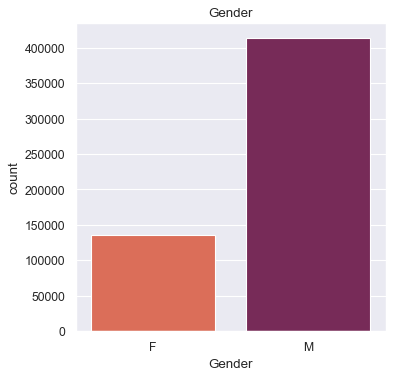

[414259 135809]


In [73]:
# Column : Gender

plt.figure(figsize = (5,5), dpi = 80)
plt.title('Gender')
sns.countplot(df['Gender'], palette="rocket_r")

plt.show()
print(df['Gender'].value_counts().unique())

* This tells us that there are more males buying different products during the Black Friday Sale than females.
1. Total Male Count : 4,14,259
2. Total Female Count : 1,35,809

## Column : Age

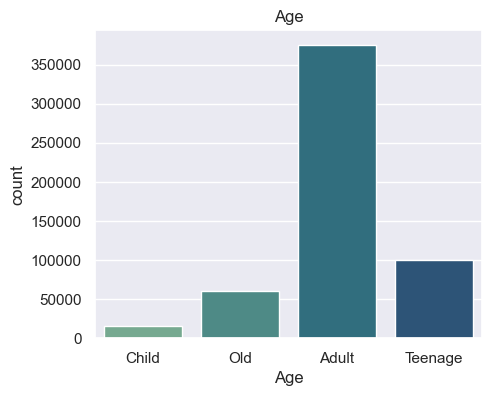

[375301  99660  60005  15102]


In [74]:
plt.figure(figsize = (5,4))
plt.title('Age')
sns.countplot(data=df, x = 'Age', palette = 'crest')

plt.show()
print(df['Age'].value_counts().unique())

* The graph clearly tells us that Adults (26 - 50 years) visit the stores during the Back Friday Sale in huge numbers whereas stores are least visited by the Children (0 - 17 years).

## Column : Occupation

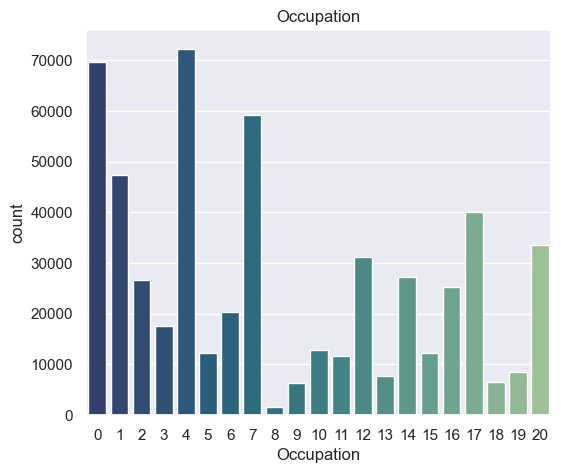

In [75]:
plt.figure(figsize = (6,5), dpi = 100)
plt.title('Occupation')
sns.countplot(df['Occupation'], palette = 'crest_r')
plt.show()

## Column : City_Category

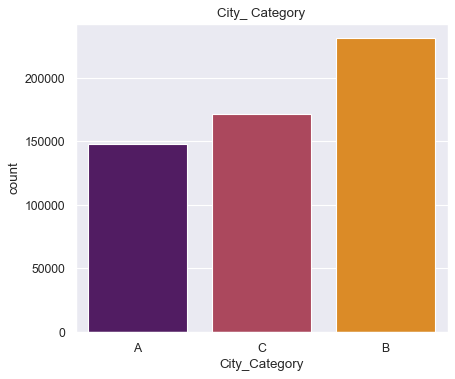

[231173 171175 147720]


In [76]:
plt.figure(figsize = (6,5), dpi = 80)
plt.title('City_ Category')
sns.countplot(data = df, x = 'City_Category', palette = 'inferno')

plt.show()
print(df['City_Category'].value_counts().unique())

# City_Category (Percentage Distribution)


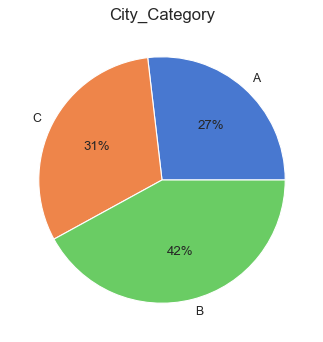

In [77]:
data = df['City_Category'].value_counts(ascending = True) # Counting the unique values frquencies

labels = df['City_Category'].unique()  # Creating unique value labels

plt.figure(figsize = (5,5), dpi = 80)
plt.title('City_Category', size = 15)

# Define seaborn color palette to use
colors = sns.color_palette('muted')
# colors name = (spectral,deep, muted, bright, pastel, dark, colorblind, husl,hls)

# Creating pie chart
plt.pie(data, labels = labels, colors = colors, autopct = '%.0f%%')

plt.show()

* People visiting the store maximum belong to **City_Category B** while the store is least visited by people belonging to **City Category A**.
1. Total People of City **A** : <font color = 'blue'> 1,47,720 </font>
2. Total People of City **B** : <font color = 'blue'> 2,31,173 </font>
3. Total People of City **C** : <font color = 'blue'> 1,71,175 </font>
* This shows that **City A**, **City B**, and **City C** has contributed **27%, 42%, and 31%** respectively to the total purchase made on Black Friday Sale.
* we can also say that **maximum** stores are located in **City B**

# Column : Stay in Current City

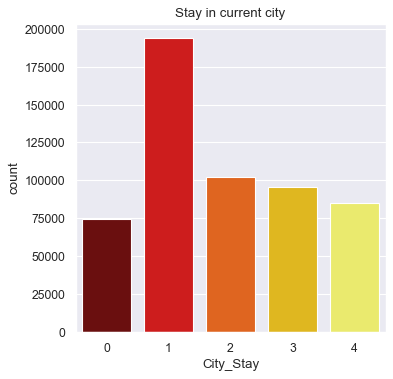

In [78]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Stay in current city')
sns.countplot(df['City_Stay'], palette = 'hot')

plt.show()

## Columns : Marital Status

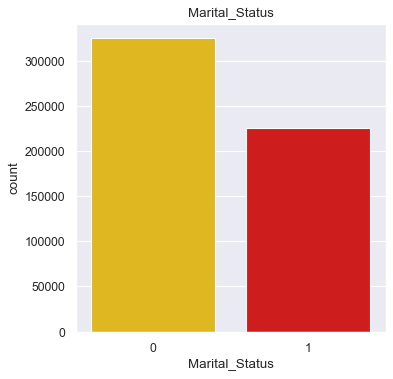

[324731 225337]


In [79]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Marital_Status')
sns.countplot(df['Marital_Status'], palette = 'hot_r')

plt.show()
print(df['Marital_Status'].value_counts().unique())

# Column : Marital Status (Percentage Distibution)

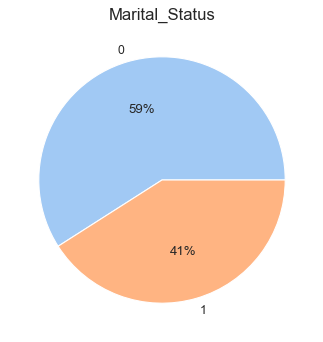

In [80]:
# Define data
data = df['Marital_Status'].value_counts()   # counting the unique values frequency
labels = df['Marital_Status'].unique()  # creating unique values labels

plt.figure(figsize = (5,5), dpi = 80)
plt.title('Marital_Status', size = 15)
# Married = 0
# Unmarried = 1

# Define Seaborn color palette to use
colors = sns.color_palette('pastel')

# Create Pie Chart
plt.pie(data, labels = labels, colors = colors, autopct = '%.0f%%')

plt.show()

**Unmarried** People visiting the store are in huge amount as compared to **Married** during the ***Black Friday Sale***
1. Total **Single** People  : <font color = 'blue'> 3,24,731 </font>
2. Total **Married** People : <font color = 'blue'> 2,25,337 </font>

This shows that **Unmarried and Married** people have contributed **59% and 41%** respectively to the **total purchase** made on ***Black Friday Sale.***

# Column : Product1

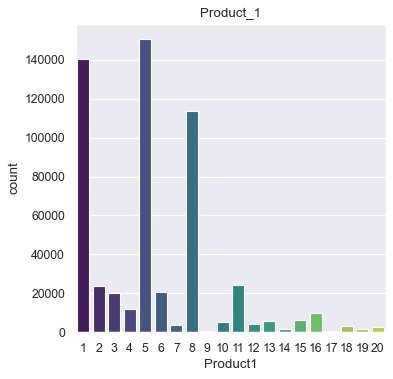

In [81]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Product_1')

sns.countplot(df['Product1'], palette = 'viridis')

plt.show()

# Column : Product_2

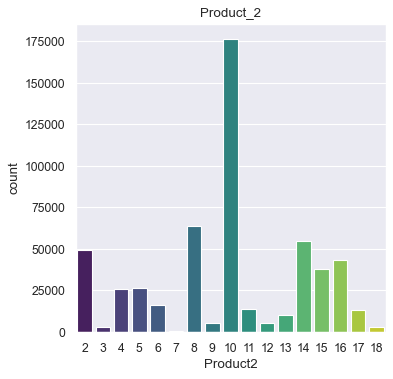

In [82]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Product_2')

sns.countplot(df['Product2'], palette = 'viridis')

plt.show()

# Column : Product_3

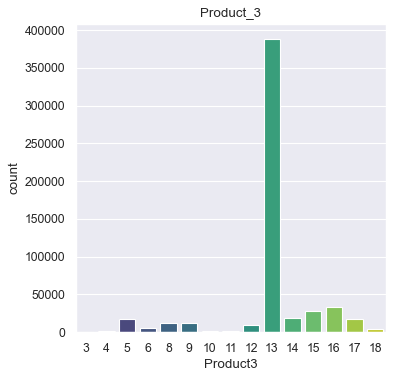

In [83]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Product_3')

sns.countplot(df['Product3'], palette = 'viridis')

plt.show()

# Column : Purchase

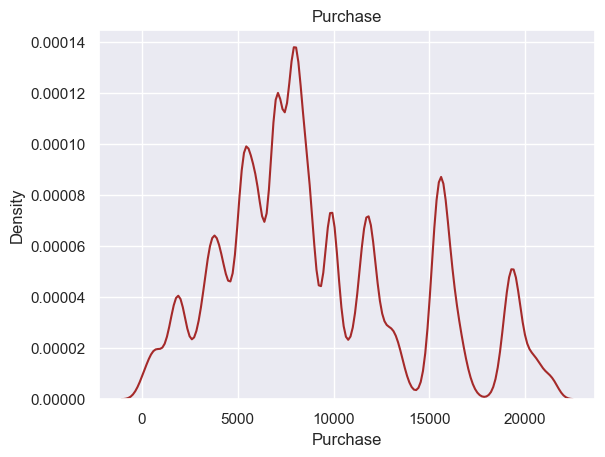

In [84]:
plt.title('Purchase')
sns.kdeplot(df['Purchase'], color = 'brown')

plt.show()

* Purchase rate is highest between the range of 5000-10,000.
* Purchase rate even goes upto range 25,000.

# Gender vs Purchase

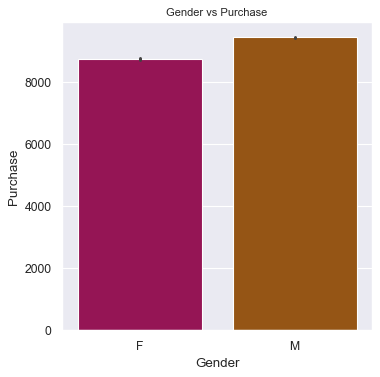

In [85]:
plt.figure(figsize = (5,5), dpi = 80)

plt.title('Gender vs Purchase', size = 10)

sns.barplot(x = 'Gender', y = 'Purchase', data = df, palette = 'brg')
plt.xlabel('Gender', size = 12)
plt.ylabel('Purchase', size = 12)

plt.show()

# Subplot of all columns with Purchase

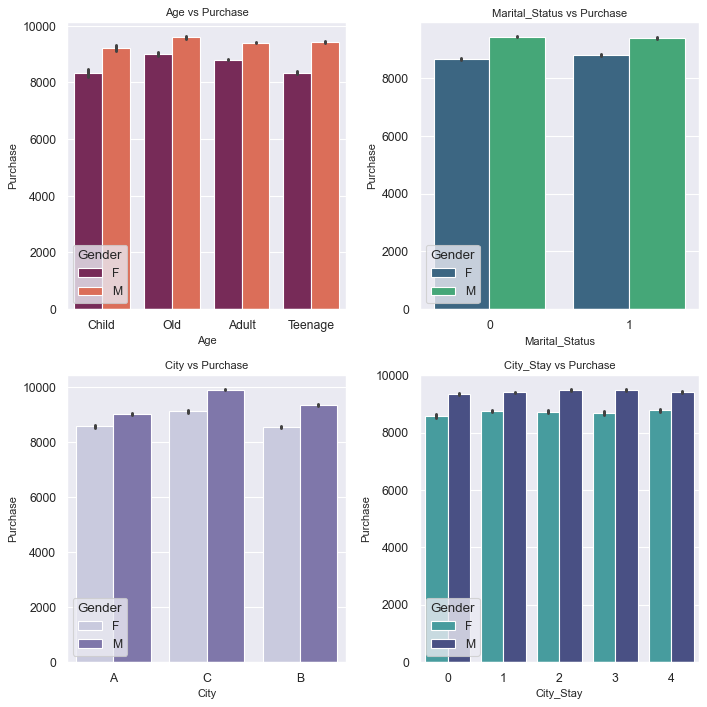

In [86]:
plt.figure(figsize = (9,9), dpi = 80)

plt.subplot(2,2,1)
plt.title('Age vs Purchase', size = 10)
sns.barplot(x = 'Age', y = 'Purchase', data = df, palette = 'rocket', hue = 'Gender')
plt.xlabel('Age', size = 10)
plt.ylabel('Purchase', size = 10)


plt.subplot(2,2,2)
plt.title('Marital_Status vs Purchase', size = 10)
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = df, palette = 'viridis', hue = 'Gender')
plt.xlabel('Marital_Status', size = 10)
plt.ylabel('Purchase', size = 10)


plt.subplot(2,2,3)
plt.title('City vs Purchase', size = 10)
sns.barplot(x = 'City_Category', y = 'Purchase', data = df, palette = 'Purples', hue = 'Gender')
plt.xlabel('City', size = 10)
plt.ylabel('Purchase', size = 10)


plt.subplot(2,2,4)
plt.title('City_Stay vs Purchase', size = 10)
sns.barplot(x = 'City_Stay', y = 'Purchase', data = df, palette = 'mako_r', hue = 'Gender')
plt.xlabel('City_Stay', size = 10)
plt.ylabel('Purchase', size = 10)

plt.tight_layout()
plt.show()

# Age vs Purchase

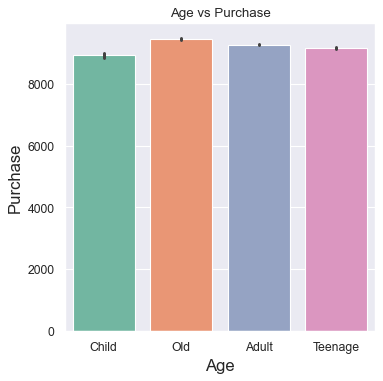

In [87]:
plt.figure(figsize = (5,5), dpi = 80)
plt.title('Age vs Purchase')
sns.barplot(x = 'Age', y = 'Purchase', data = df, palette = 'Set2')
plt.xlabel('Age', size = 15)
plt.ylabel('Purchase', size = 15)
plt.show()

# Subplots

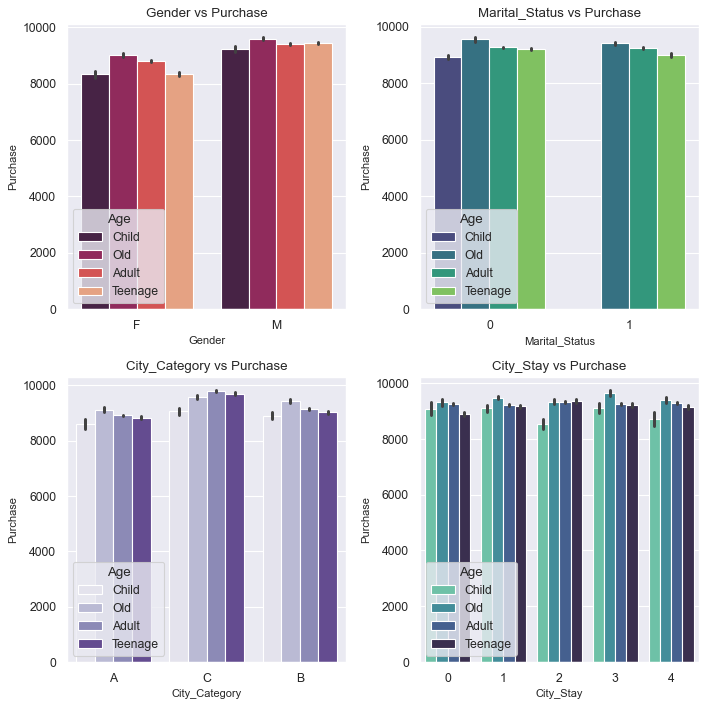

In [88]:
plt.figure(figsize = (9,9), dpi = 80)

# Gender vs Purchase
plt.subplot(2,2,1)
plt.title('Gender vs Purchase')
sns.barplot(x = 'Gender', y = 'Purchase', data = df, palette = 'rocket', hue = 'Age')
plt.xlabel('Gender', size = 10)
plt.ylabel('Purchase', size = 10)

# Marital_Status vs Purchase
plt.subplot(2,2,2)
plt.title('Marital_Status vs Purchase')
sns.barplot(x = 'Marital_Status', y = 'Purchase', data = df, palette = 'viridis', hue = 'Age')
plt.xlabel('Marital_Status', size = 10)
plt.ylabel('Purchase', size = 10)


# City_Category vs Purchase
plt.subplot(2,2,3)
plt.title('City_Category vs Purchase')
sns.barplot(x = 'City_Category', y = 'Purchase', data = df, palette = 'Purples', hue = 'Age')
plt.xlabel('City_Category', size = 10)
plt.ylabel('Purchase', size = 10)


# City_Stay vs Purchase
plt.subplot(2,2,4)
plt.title('City_Stay vs Purchase')
sns.barplot(x = 'City_Stay', y = 'Purchase', data = df, palette = 'mako_r', hue = 'Age')
plt.xlabel('City_Stay', size = 10)
plt.ylabel('Purchase', size = 10)

plt.tight_layout()
plt.show()

# Plotting various Products vs Purchase

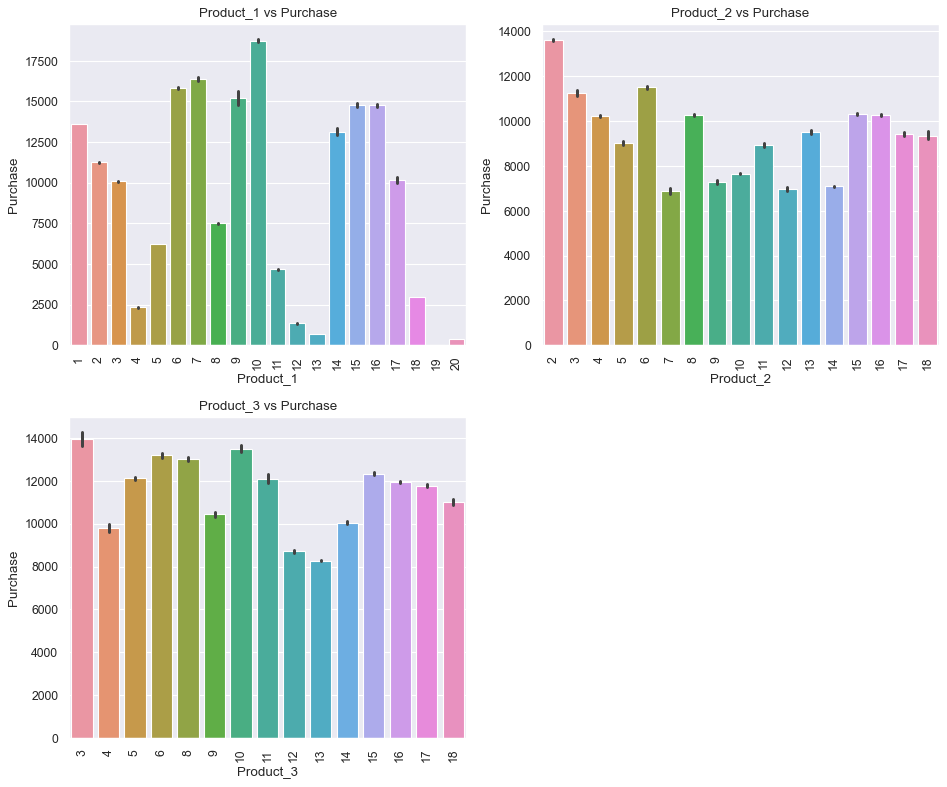

In [89]:
plt.figure(figsize = (12,10), dpi = 80)

# 'Product_1 vs Purchase'
plt.subplot(2,2,1)
plt.title('Product_1 vs Purchase')
sns.barplot(x = 'Product1', y = 'Purchase', data = df)
plt.xlabel('Product_1')
plt.ylabel('Purchase')
plt.xticks(rotation = 90)


# 'Product_2 vs Purchase'
plt.subplot(2,2,2)
plt.title('Product_2 vs Purchase')
sns.barplot(x = 'Product2', y = 'Purchase', data = df)
plt.xlabel('Product_2')
plt.ylabel('Purchase')
plt.xticks(rotation = 90)
          

# 'Product_3 vs Purchase'
plt.subplot(2,2,3)
plt.title('Product_3 vs Purchase')
sns.barplot(x = 'Product3', y = 'Purchase', data = df)
plt.xlabel('Product_3')
plt.ylabel('Purchase')
plt.xticks(rotation = 90)

plt.tight_layout()
plt.show()

# Purchasing Distribution according to Marital status

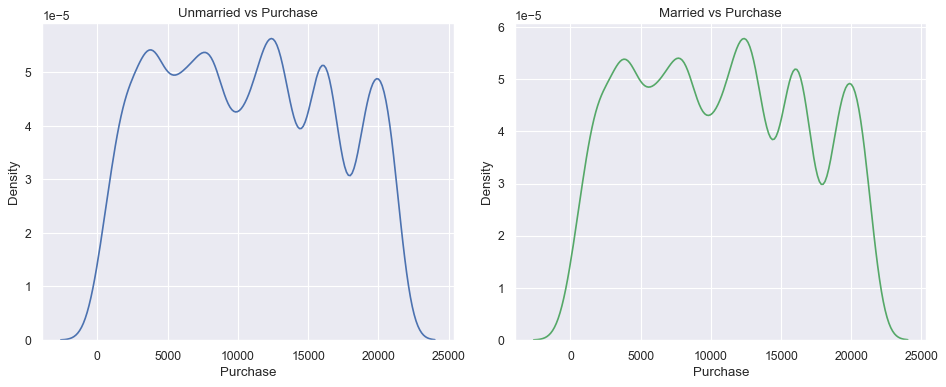

In [92]:
plt.figure(figsize = (12,5), dpi = 80)

# Unmarried vs Purchase
plt.subplot(1,2,1)
um = df[df['Marital_Status'] == 0].value_counts('Purchase')
plt.title('Unmarried vs Purchase', size = 12)
sns.kdeplot('Purchase', data = um, color = 'b')

# Married vs Purchase
plt.subplot(1,2,2)
m = df[df['Marital_Status'] == 1].value_counts('Purchase')
plt.title('Married vs Purchase', size = 12)
sns.kdeplot('Purchase', data = m, color = 'g')

plt.tight_layout()
plt.show()

# Purchasing Distribution according to Gender

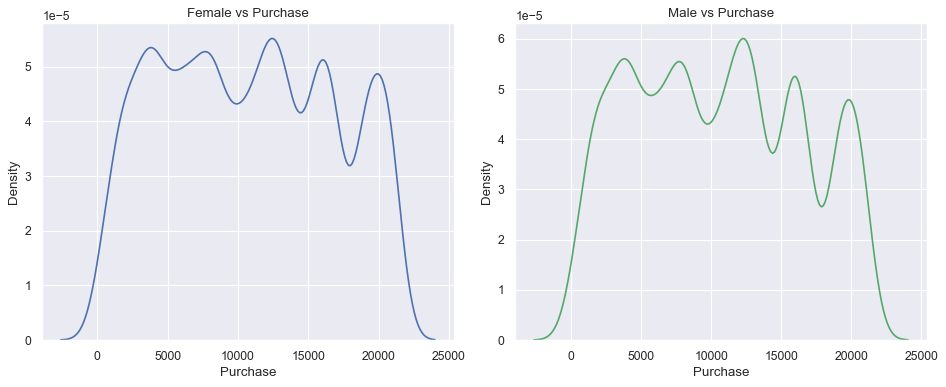

In [94]:
plt.figure(figsize = (12,5), dpi = 80)

# Unmarried vs Purchase
plt.subplot(1,2,1)
um = df[df['Gender'] == 'M'].value_counts('Purchase')
plt.title('Female vs Purchase', size = 12)
sns.kdeplot('Purchase', data = um, color = 'b')

# Married vs Purchase
plt.subplot(1,2,2)
m = df[df['Gender'] == 'F'].value_counts('Purchase')
plt.title('Male vs Purchase', size = 12)
sns.kdeplot('Purchase', data = m, color = 'g')

plt.tight_layout()
plt.show()

In [95]:
df.head()

,User_ID,Gender,Age,Occupation,City_Category,City_Stay,Marital_Status,Product1,Product2,Product3,Purchase
0,1000001,F,Child,10,A,2,0,3,10,13,8370.0
1,1000001,F,Child,10,A,2,0,1,6,14,15200.0
2,1000001,F,Child,10,A,2,0,12,10,13,1422.0
3,1000001,F,Child,10,A,2,0,12,14,13,1057.0
4,1000002,M,Old,16,C,4,0,8,10,13,7969.0


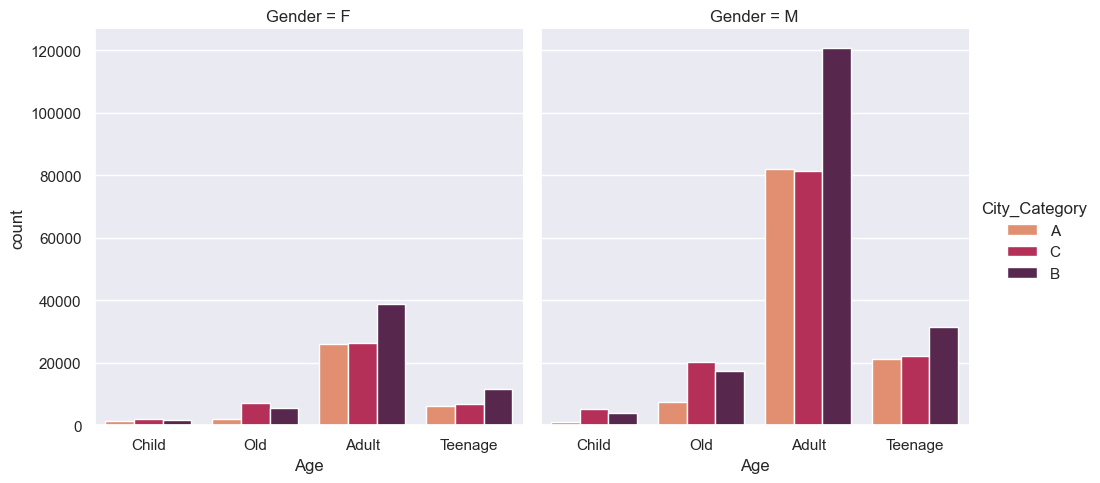

In [96]:
sns.catplot(data = df, x = 'Age', col = 'Gender', hue = 'City_Category', palette = 'rocket_r', kind = 'count')
plt.show()

## Questio : Out of the three product categories which is the most consumed product category in each city?

In [101]:
# Grouping the dataset o on the basis of the cities

df_gp = df.groupby('City_Category')
print(df_gp.groups)

{'A': [0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16, 17, 56, 57, 58, 59, 60, 61, 62, 63, 64, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 124, 125, 126, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 234, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 297, 298, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, ...], 'B': [6, 7, 8, 18, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 97, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 220, 221, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, ...], 'C': [4, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 47, 48, 49

In [102]:
# Getting group keys fromm the dataset

df_key = df_gp.groups.keys()
df_key

dict_keys(['A', 'B', 'C'])

In [106]:
for i in df_key:
    print('\n - City_Category {} :'.format(i), '\n')
    print(df_gp.get_group(i)[['Product1', 'Product2', 'Product3']].sum().sort_values(ascending = True))
    
    print('_')
    print('')


 - City_Category A : 

Product1     813387
Product2    1471578
Product3    1907037
dtype: int64
_


 - City_Category B : 

Product1    1242828
Product2    2284299
Product3    2982602
dtype: int64
_


 - City_Category C : 

Product1     916501
Product2    1685451
Product3    2205901
dtype: int64
_



* Product 3 is the most consumed product in all the three cities where as Product 1 is the least consumed one.

### Observation :-

1. Males had shown up at stores in large numbers during the sale.
    * There is an interesing finding in this analysis. There is a humongus gap between the number of men and women visiting different stores during the Black Friday Sale and making purchases. However, this gap significantly reduces when we look at the amount of purchases made by both the genders.
    * This tells perhaps women spent money on products with high MRP. Or another possibility could be that they bought large quatities of the product.
    
1. During the sale adults between the age group of 26 to 50 years visited the stores and made purchases in large numbers.
    * However, the purchasing power can be seen high among the people of older generation (51 to 55+ years of age). This means that older people spent more money than any other generations.
    * While it is least among the children (0 to 17 years).
    
1. In City B maximum people made purchases.

1. Unmarried People did maximum purchasing

1. People made maximum purchases in between the range of 5,000 to 10,000.

1. In Product 1 and Product 2 graph it can be seen that their 10th product is purchased the most while 3rd product of Product 3 is more purchesd in comparission to other products of Product 3.

1. It can also be seen from these graphs that the 10th Product of Product 1 has been the most purchased product in comparsion to all the 3 Product i.e. Product 1, Product 2, and Product 3.

1. Male children who have been living in City A for two years have the maximum pruchase mean. While Female and Male children who have been living in the City A for four or more years have the minimum purchase mean.

### Result :-
The data set given to us was dirty.

To clean the Pandas and Numpy was used. Null values were treated. Outlier were checked and were appropriately adjusted using capping. After cleaning we used Seaborn and Matplotlib libraries for data visualization to draw important obvervations.